In [6]:
#from osgeo import gdal
import numpy as np
import math
import rasterio as rio
import xarray as xr
import holoviews as hv
import hvplot.xarray
import netCDF4 as n4

In [7]:
import sys
sys.path.append('C:/Users/janna/Downloads')
from emit_tools import emit_xarray

In [8]:
import rioxarray

In [9]:
fp = r"C:\Users\janna\Downloads\EMIT_L2A_RFL_001_20220827T165843_2223911_013.nc"

In [10]:
ds = emit_xarray(fp)
ds

<xarray.Dataset>
Dimensions:           (latitude: 2131, longitude: 2324, bands: 285)
Coordinates:
  * latitude          (latitude) float64 34.53 34.53 34.53 ... 33.38 33.38 33.38
  * longitude         (longitude) float64 -101.0 -101.0 -101.0 ... -99.71 -99.71
    fwhm              (bands) float32 8.415 8.415 8.415 ... 8.806 8.807 8.809
    good_wavelengths  (bands) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    wavelengths       (bands) float32 381.0 388.4 395.8 ... 2.486e+03 2.493e+03
    spatial_ref       int32 0
Dimensions without coordinates: bands
Data variables:
    reflectance       (latitude, longitude, bands) float32 nan nan ... nan nan
Attributes: (12/39)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.00965598e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20220827T165843_22239...
    Orthorectified:                    True

In [25]:
nir2 = ds['reflectance'].sel(bands=63)

In [26]:
nir2

<xarray.DataArray 'reflectance' (latitude: 2131, longitude: 2324)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude          (latitude) float64 34.53 34.53 34.53 ... 33.38 33.38 33.38
  * longitude         (longitude) float64 -101.0 -101.0 -101.0 ... -99.71 -99.71
    fwhm              float32 8.499
    good_wavelengths  float32 1.0
    wavelengths       float32 850.1
    spatial_ref       int32 0
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [31]:
# Assign a CRS.
#nir2 = nir2.rio.write_crs(4326)

# Rename some dimensions.
nir2 = ds.sel(bands = 63).rename({"latitude": "y", "longitude": "x"})

# Create 1 geoTIFF per variable.
nir2.rio.to_raster(f"C:/Users/janna/Downloads/test2.tif")

In [35]:
nir2

<xarray.Dataset>
Dimensions:           (y: 2131, x: 2324)
Coordinates:
  * y                 (y) float64 34.53 34.53 34.53 34.53 ... 33.38 33.38 33.38
  * x                 (x) float64 -101.0 -101.0 -101.0 ... -99.71 -99.71 -99.71
    fwhm              float32 8.499
    good_wavelengths  float32 1.0
    wavelengths       float32 850.1
    spatial_ref       int32 0
Data variables:
    reflectance       (y, x) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/39)
    ncei_template_version:             NCEI_NetCDF_Swath_Template_v2.0
    summary:                           The Earth Surface Mineral Dust Source ...
    keywords:                          Imaging Spectroscopy, minerals, EMIT, ...
    Conventions:                       CF-1.63
    sensor:                            EMIT (Earth Surface Mineral Dust Sourc...
    instrument:                        EMIT
    ...                                ...
    spatial_ref:                       GEOGCS["WGS 84",DATUM["WGS_1984",SPHER...
    geotransform:                      [-1.00965598e+02  5.42232520e-04 -0.00...
    day_night_flag:                    Day
    title:                             EMIT L2A Estimated Surface Reflectance...
    granule_id:                        EMIT_L2A_RFL_001_20220827T165843_22239...
    Orthorectified:                    True

In [11]:
b850 = np.nanargmin(abs(ds['wavelengths'].values-850)) # Find band nearest to value of 850 nm (NIR)
ds.sel(bands=b850).hvplot.image(cmap='viridis', aspect = 'equal', rasterize=True) 

:DynamicMap   []
   :Image   [longitude,latitude]   (reflectance)

In [13]:
nir = ds.sel(bands=b850)

In [14]:
b650 = np.nanargmin(abs(ds['wavelengths'].values-650)) # Find band nearest to value of 850 nm (NIR)
ds.sel(bands=b650).hvplot.image(cmap='viridis', aspect = 'equal', rasterize=True) 

:DynamicMap   []
   :Image   [longitude,latitude]   (reflectance)

In [15]:
red = ds.sel(bands=b650)

In [16]:
nir['reflectance']

<xarray.DataArray 'reflectance' (latitude: 2131, longitude: 2324)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude          (latitude) float64 34.53 34.53 34.53 ... 33.38 33.38 33.38
  * longitude         (longitude) float64 -101.0 -101.0 -101.0 ... -99.71 -99.71
    fwhm              float32 8.499
    good_wavelengths  float32 1.0
    wavelengths       float32 850.1
    spatial_ref       int32 0
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [17]:
nir.rio.write_crs("epsg:4326", inplace=True)
nir.rio.to_raster('C:/Users/janna/Downloads/test.tif')

In [32]:
src = rio.open('C:/Users/janna/Downloads/test2.tif')
array = src.read(1)
array.shape


(2131, 2324)

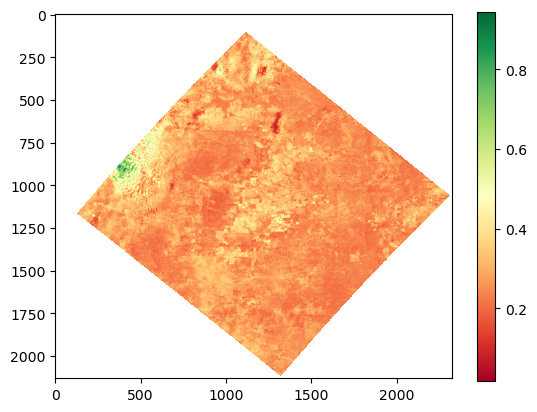

In [33]:
plt.imshow(array,cmap='RdYlGn')
plt.colorbar()

In [41]:
#3d
def calc_ndvi(nir,red):
    nir = nir.astype(float)
    red = red.astype(float)
    ndvi = (nir - red) / (nir + red)
    return ndvi

In [48]:
nir['reflectance']

<xarray.DataArray 'reflectance' (latitude: 2131, longitude: 2324)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude          (latitude) float64 34.53 34.53 34.53 ... 33.38 33.38 33.38
  * longitude         (longitude) float64 -101.0 -101.0 -101.0 ... -99.71 -99.71
    fwhm              float32 8.499
    good_wavelengths  float32 1.0
    wavelengths       float32 850.1
    spatial_ref       int32 0
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [49]:
test_ndvi = calc_ndvi(nir['reflectance'], red['reflectance'])

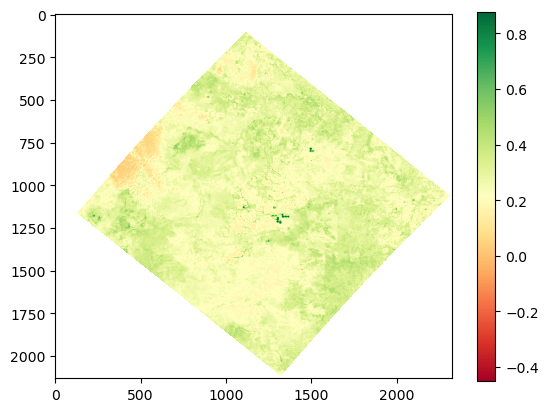

In [50]:
plt.imshow(test_ndvi,cmap='RdYlGn')
plt.colorbar()
plt.show()

In [20]:
import matplotlib.pyplot as plt

In [42]:
precip = ds.reflectance.transpose('bands', 'latitude', 'longitude').sel(bands=63)
precip.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
precip.rio.write_crs("EPSG:4326", inplace=True)

<xarray.DataArray 'reflectance' (latitude: 2131, longitude: 2324)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * latitude          (latitude) float64 34.53 34.53 34.53 ... 33.38 33.38 33.38
  * longitude         (longitude) float64 -101.0 -101.0 -101.0 ... -99.71 -99.71
    fwhm              float32 8.499
    good_wavelengths  float32 1.0
    wavelengths       float32 850.1
    spatial_ref       int32 0
Attributes:
    long_name:  Surface Reflectance
    units:      unitless

In [43]:
precip.rio.to_raster('C:/Users/janna/Downloads/test3.tif')

In [ ]:
src = rio.open('C:/Users/janna/Downloads/test2.tif')
array = src.read(1)
array.shape


In [ ]:
xds.rio.write_crs("epsg:4326", inplace=True)
#Then, you should be able to create a geotiff from the Evapotranspiration like so:

xds["Evapotranspiration"].rio.to_raster('D:\Weather data\test.tif')

In [ ]:
plt.imshow(test_ndvi,cmap='RdYlGn')
plt.colorbar()
plt.show()

In [ ]:
# Convert lat/lon to grid-coordinates
    lly, llx = geo2grid(extent[1], extent[0], file)
    ury, urx = geo2grid(extent[3], extent[2], file)
            
    # Get the pixel values
    data_ch03 = file.variables['CMI'][ury:lly, llx:urx]      
    
    #-----------------------------------------------------------------------------------------------------------
    
    # Make the arrays equal size
    cordX = np.shape(data_ch02)[0], np.shape(data_ch03)[0]
    cordY = np.shape(data_ch02)[1], np.shape(data_ch03)[1]

    minvalX = np.array(cordX).min()
    minvalY = np.array(cordY).min()

    data_ch02 = data_ch02[0:minvalX, 0:minvalY]
    data_ch03 = data_ch03[0:minvalX, 0:minvalY]
    
    #-----------------------------------------------------------------------------------------------------------
    
    # Calculate the NDVI
    data = (data_ch03 - data_ch02) / (data_ch03 + data_ch02)